In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_rows=100
pd.options.display.max_columns=100

In [2]:
whoop=pd.read_csv('whoop_data.csv')

In [3]:
strava=pd.read_csv('my_actvities.csv')

In [4]:
strava.shape, whoop.shape

((173, 35), (222, 12))

In [5]:
mult_mile=0.000621371
strava['miles']=strava.distance*mult_mile

## Whoop data discovery

In [6]:
whoop.head()

,strain,recovery,sleep_perf,sleep,rec_sleep,date,activity_1,activity_1_score,activity_2,activity_2_score,activity_3,activity_3_score
0,17.3,78%,100%,10:02,8:40,"Today, Jan 4th",Running,15.4,NaN,NaN,NaN,NaN
1,12.8,50%,86%,8:27,9:52,"Thu, Jan 3rd",Weightlifting,7.0,NaN,NaN,NaN,NaN
2,17.6,28%,69%,6:09,8:55,"Wed, Jan 2nd",Running,16.3,NaN,NaN,NaN,NaN
3,18.1,37%,96%,7:44,8:04,"Tue, Jan 1st",Running,15.7,Activity,7.3,NaN,NaN
4,12.1,36%,100%,9:53,8:37,"Mon, Dec 31st",NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
whoop.recovery.value_counts()

24%                 8
32%                 7
36%                 7
27%                 6
30%                 6
25%                 6
85%                 6
49%                 6
37%                 6
38%                 5
63%                 5
44%                 5
16%                 5
35%                 5
28%                 5
21%                 5
26%                 4
34%                 4
75%                 4
61%                 4
33%                 4
69%                 4
94%                 4
48%                 4
18%                 4
46%                 3
54%                 3
Incomplete\nData    3
29%                 3
89%                 3
19%                 3
60%                 3
59%                 3
17%                 3
13%                 3
20%                 2
---                 2
78%                 2
11%                 2
82%                 2
47%                 2
67%                 2
23%                 2
70%                 2
86%                 2
41%       

In [8]:
print(whoop.activity_1.value_counts())
print(whoop.activity_2.value_counts())
print(whoop.activity_3.value_counts())

Running               69
Cycling               26
Swimming              15
Weightlifting          6
Activity               5
Hiking/Rucking         3
Other                  2
Triathlon              2
Football               1
Functional Fitness     1
Golf                   1
Soccer                 1
Name: activity_1, dtype: int64
Running     9
Activity    6
Cycling     4
Swimming    3
Other       2
Name: activity_2, dtype: int64
Cycling    4
Other      1
Running    1
Name: activity_3, dtype: int64


In [9]:
whoop['recovery']=whoop['recovery'].astype(str).apply(lambda x: np.nan if '%' not in x else float(x[:len(x)-1])/100)
whoop['sleep_perf']=whoop['sleep_perf'].astype(str).apply(lambda x: np.nan if '-' in x or "na" in x else float(x[:len(x)-1])/100)


In [10]:
whoop['rec_color']=whoop.recovery.apply(lambda x: 'red' if x<.34 else ('yellow' if x<.67 else ('none' if np.isnan(x) else 'green') ))
whoop.rec_color.value_counts()

red       83
yellow    83
green     50
none       6
Name: rec_color, dtype: int64

In [11]:
whoop.head()

,strain,recovery,sleep_perf,sleep,rec_sleep,date,activity_1,activity_1_score,activity_2,activity_2_score,activity_3,activity_3_score,rec_color
0,17.3,0.78,1.00,10:02,8:40,"Today, Jan 4th",Running,15.4,NaN,NaN,NaN,NaN,green
1,12.8,0.50,0.86,8:27,9:52,"Thu, Jan 3rd",Weightlifting,7.0,NaN,NaN,NaN,NaN,yellow
2,17.6,0.28,0.69,6:09,8:55,"Wed, Jan 2nd",Running,16.3,NaN,NaN,NaN,NaN,red
3,18.1,0.37,0.96,7:44,8:04,"Tue, Jan 1st",Running,15.7,Activity,7.3,NaN,NaN,yellow
4,12.1,0.36,1.00,9:53,8:37,"Mon, Dec 31st",NaN,NaN,NaN,NaN,NaN,NaN,yellow


(array([ 1.,  0.,  1., 10., 27., 39., 47., 40., 36., 21.]),
 array([ 0.  ,  2.07,  4.14,  6.21,  8.28, 10.35, 12.42, 14.49, 16.56,
        18.63, 20.7 ]),
 <a list of 10 Patch objects>)

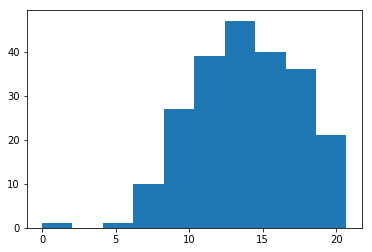

In [12]:
whoop.strain=whoop.strain.apply(lambda x: float(x) if x!="---" else 0)
plt.hist(whoop.strain)

In [13]:
for i in range(1,8):
    print(whoop.recovery.autocorr(lag=i))

0.01339240935736611
0.04043527262019506
0.12884124388214863
0.0557647046489472
-0.015350577169256781
-0.015275776233907717
0.08873767330893535


In [14]:
whoop.dtypes

strain              float64
recovery            float64
sleep_perf          float64
sleep                object
rec_sleep            object
date                 object
activity_1           object
activity_1_score    float64
activity_2           object
activity_2_score    float64
activity_3           object
activity_3_score    float64
rec_color            object
dtype: object

In [15]:
def time_to_dec(t):
    if ":" in t:
        hr=float(t[:t.find(':')])
        m=float(t[t.find(':')+1:])/60
        return hr+m
    else:
        return np.nan
whoop.sleep=whoop.sleep.astype(str).apply(time_to_dec)
whoop.rec_sleep=whoop.rec_sleep.astype(str).apply(time_to_dec)

In [16]:
whoop.head()

,strain,recovery,sleep_perf,sleep,rec_sleep,date,activity_1,activity_1_score,activity_2,activity_2_score,activity_3,activity_3_score,rec_color
0,17.3,0.78,1.00,10.033333,8.666667,"Today, Jan 4th",Running,15.4,NaN,NaN,NaN,NaN,green
1,12.8,0.50,0.86,8.450000,9.866667,"Thu, Jan 3rd",Weightlifting,7.0,NaN,NaN,NaN,NaN,yellow
2,17.6,0.28,0.69,6.150000,8.916667,"Wed, Jan 2nd",Running,16.3,NaN,NaN,NaN,NaN,red
3,18.1,0.37,0.96,7.733333,8.066667,"Tue, Jan 1st",Running,15.7,Activity,7.3,NaN,NaN,yellow
4,12.1,0.36,1.00,9.883333,8.616667,"Mon, Dec 31st",NaN,NaN,NaN,NaN,NaN,NaN,yellow


### Making Variables

In [17]:
whoop['activity_total']=whoop[['activity_1_score','activity_2_score','activity_3_score']].apply(lambda x: sum([0 if np.isnan(y) else 1 for y in x ]),axis=1 )
whoop.activity_total.value_counts()

1    108
0     90
2     18
3      6
Name: activity_total, dtype: int64

In [18]:
whoop['sleep_addition']=whoop.rec_sleep-7.75

In [19]:
whoop['pday_rec']=whoop['recovery'].shift(-1)
whoop['pday_rec_col']=whoop['rec_color'].shift(-1)
whoop['pday_acts']=whoop['activity_total'].shift(-1)
whoop['pday_strain']=whoop['strain']
whoop['pday_sleep']=whoop.sleep.shift(-1)
whoop['pday_sleep_perf']=whoop.sleep_perf.shift(-1)

In [20]:
whoop['rolling_prev_2']=whoop.pday_sleep.rolling(2).mean()
whoop['prev_strain_rec_gap']=whoop.pday_strain/whoop.pday_strain.max()-whoop.pday_rec

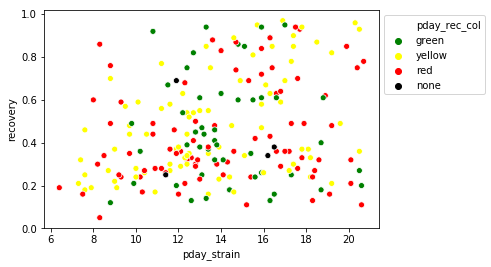

In [21]:
palet={'green':'green','yellow':'yellow','green':'green','none':'black','red':'red'}
sns.scatterplot('pday_strain','recovery',data=whoop, hue='pday_rec_col',
                hue_order=['green','yellow','red','none'],
               palette=palet)
plt.legend(bbox_to_anchor=(1,1))

In [22]:
whoop.head()

,strain,recovery,sleep_perf,sleep,rec_sleep,date,activity_1,activity_1_score,activity_2,activity_2_score,activity_3,activity_3_score,rec_color,activity_total,sleep_addition,pday_rec,pday_rec_col,pday_acts,pday_strain,pday_sleep,pday_sleep_perf,rolling_prev_2,prev_strain_rec_gap
0,17.3,0.78,1.00,10.033333,8.666667,"Today, Jan 4th",Running,15.4,NaN,NaN,NaN,NaN,green,1,0.916667,0.50,yellow,1.0,17.3,8.450000,0.86,NaN,0.335749
1,12.8,0.50,0.86,8.450000,9.866667,"Thu, Jan 3rd",Weightlifting,7.0,NaN,NaN,NaN,NaN,yellow,1,2.116667,0.28,red,1.0,12.8,6.150000,0.69,7.300000,0.338357
2,17.6,0.28,0.69,6.150000,8.916667,"Wed, Jan 2nd",Running,16.3,NaN,NaN,NaN,NaN,red,1,1.166667,0.37,yellow,2.0,17.6,7.733333,0.96,6.941667,0.480242
3,18.1,0.37,0.96,7.733333,8.066667,"Tue, Jan 1st",Running,15.7,Activity,7.3,NaN,NaN,yellow,2,0.316667,0.36,yellow,0.0,18.1,9.883333,1.00,8.808333,0.514396
4,12.1,0.36,1.00,9.883333,8.616667,"Mon, Dec 31st",NaN,NaN,NaN,NaN,NaN,NaN,yellow,0,0.866667,0.16,red,1.0,12.1,5.583333,0.63,7.733333,0.424541


In [27]:
whoop.date.tail()

217     Fri, Jun 1st
218    Thu, May 31st
219    Wed, May 30th
220    Tue, May 29th
221    Mon, May 28th
Name: date, dtype: object

In [25]:
strava.start_date.dtype,whoop.date.dtype

(dtype('O'), dtype('O'))

In [26]:
strava.start_date.head()

0    2018-04-01 15:54:18+00:00
1    2018-04-03 10:35:19+00:00
2    2018-04-04 10:58:33+00:00
3    2018-04-05 10:29:13+00:00
4    2018-04-06 21:56:04+00:00
Name: start_date, dtype: object

In [110]:
month_dict={'Jan':1,'Feb':2,'Mar':3,'Apr':4, 'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
whoop['month']=whoop.date.apply(lambda x: month_dict[x[x.find(',')+1:x.find(',')+5].strip(" ")])
whoop['day']=whoop.date.apply(lambda x: x[-4:-2])
whoop['year']=whoop.month.apply(lambda x: 2018 if x!=1 else 2019)
whoop['date_string']=whoop.year.astype(str) + "-" + whoop.month.astype(str).str.strip(' ').str.zfill(2) + "-" + whoop.day.astype(str).str.strip(' ').str.zfill(2)

In [112]:
strava['day']=strava.start_date.apply(lambda x: x[8:10])
strava['month']=strava.start_date.apply(lambda x: x[5:7])
strava['year']=strava.start_date.apply(lambda x: x[:4])
strava['date_string']=strava.start_date.apply(lambda x: x[:10])

In [156]:
## Checking to see if there are more than one run on each day (since that will complicate things)
multi_act=strava.groupby(['date_string','type']).type.count().sort_values(ascending=False).unstack()
multi_dates=multi_act[multi_act.Run>1].index.values
mult_df=strava[strava.date_string.isin(multi_dates)]
mult_df.start_date_local 
## way to do it is to sort on date and assign an activity number in strava, 
## reshape activities in whoop so it's activity unique rows, then merge on activity number and activity type and date

73     2018-07-15 06:50:01+00:00
74     2018-07-15 07:39:48+00:00
75     2018-07-15 08:57:52+00:00
132    2018-10-03 06:27:25+00:00
133    2018-10-03 07:20:42+00:00
169    2018-12-25 16:51:37+00:00
170    2018-12-26 06:40:44+00:00
Name: start_date_local, dtype: object

,strain,recovery,sleep_perf,sleep,rec_sleep,date,activity_1,activity_1_score,activity_2,activity_2_score,activity_3,activity_3_score,rec_color,activity_total,sleep_addition,pday_rec,pday_rec_col,pday_acts,pday_strain,pday_sleep,pday_sleep_perf,rolling_prev_2,prev_strain_rec_gap,month,day,year,date_string
0,17.3,0.78,1.00,10.033333,8.666667,"Today, Jan 4th",Running,15.4,NaN,NaN,NaN,NaN,green,1,0.916667,0.50,yellow,1.0,17.3,8.450000,0.86,NaN,0.335749,1,4,2019,2019-01-04
1,12.8,0.50,0.86,8.450000,9.866667,"Thu, Jan 3rd",Weightlifting,7.0,NaN,NaN,NaN,NaN,yellow,1,2.116667,0.28,red,1.0,12.8,6.150000,0.69,7.300000,0.338357,1,3,2019,2019-01-03
2,17.6,0.28,0.69,6.150000,8.916667,"Wed, Jan 2nd",Running,16.3,NaN,NaN,NaN,NaN,red,1,1.166667,0.37,yellow,2.0,17.6,7.733333,0.96,6.941667,0.480242,1,2,2019,2019-01-02
3,18.1,0.37,0.96,7.733333,8.066667,"Tue, Jan 1st",Running,15.7,Activity,7.3,NaN,NaN,yellow,2,0.316667,0.36,yellow,0.0,18.1,9.883333,1.00,8.808333,0.514396,1,1,2019,2019-01-01
4,12.1,0.36,1.00,9.883333,8.616667,"Mon, Dec 31st",NaN,NaN,NaN,NaN,NaN,NaN,yellow,0,0.866667,0.16,red,1.0,12.1,5.583333,0.63,7.733333,0.424541,12,31,2018,2018-12-31


## Next steps

1. Make a few more features
2. Attach whoop to strava
3. Run linear reg - see how it does

/Users/irarickman/anaconda2/envs/py35/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


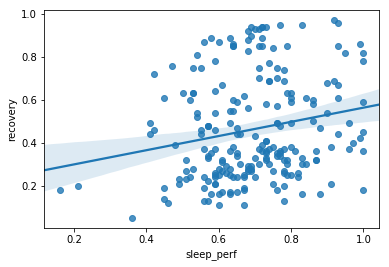

In [171]:
## maybe logarithimc?
sns.regplot(whoop.sleep_perf, whoop.recovery)

/Users/irarickman/anaconda2/envs/py35/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


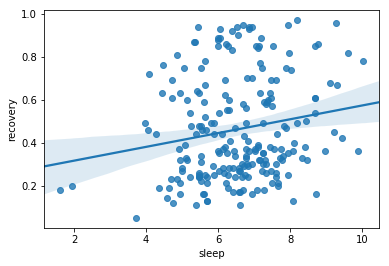

In [172]:
sns.regplot(whoop.sleep, whoop.recovery)